In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:

df = pd.read_csv('perth_house.csv')

df


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [ ]:

df.describe()


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [ ]:

df.isnull().sum()


,0
ADDRESS,0
SUBURB,0
PRICE,0
BEDROOMS,0
BATHROOMS,0
GARAGE,2478
LAND_AREA,0
FLOOR_AREA,0
BUILD_YEAR,3155
CBD_DIST,0


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [ ]:

le = LabelEncoder()

df['ADDRESS']=le.fit_transform(df['ADDRESS'])
df['SUBURB']=le.fit_transform(df['SUBURB'])
df['NEAREST_STN']=le.fit_transform(df['NEAREST_STN'])
df['DATE_SOLD']=le.fit_transform(df['DATE_SOLD'])
df['NEAREST_SCH']=le.fit_transform(df['NEAREST_SCH'])


In [ ]:


df['GARAGE'] = df['GARAGE'].fillna(df['GARAGE'].median())
df['BUILD_YEAR'] = df['BUILD_YEAR'].fillna(df['BUILD_YEAR'].median())
df['NEAREST_SCH_RANK'] = df['NEAREST_SCH_RANK'].fillna(df['NEAREST_SCH_RANK'].median())



In [ ]:

df.duplicated().sum()


0

In [ ]:

# df.hist(edgecolor = 'k', figsize=(15,15))
# plt.show()


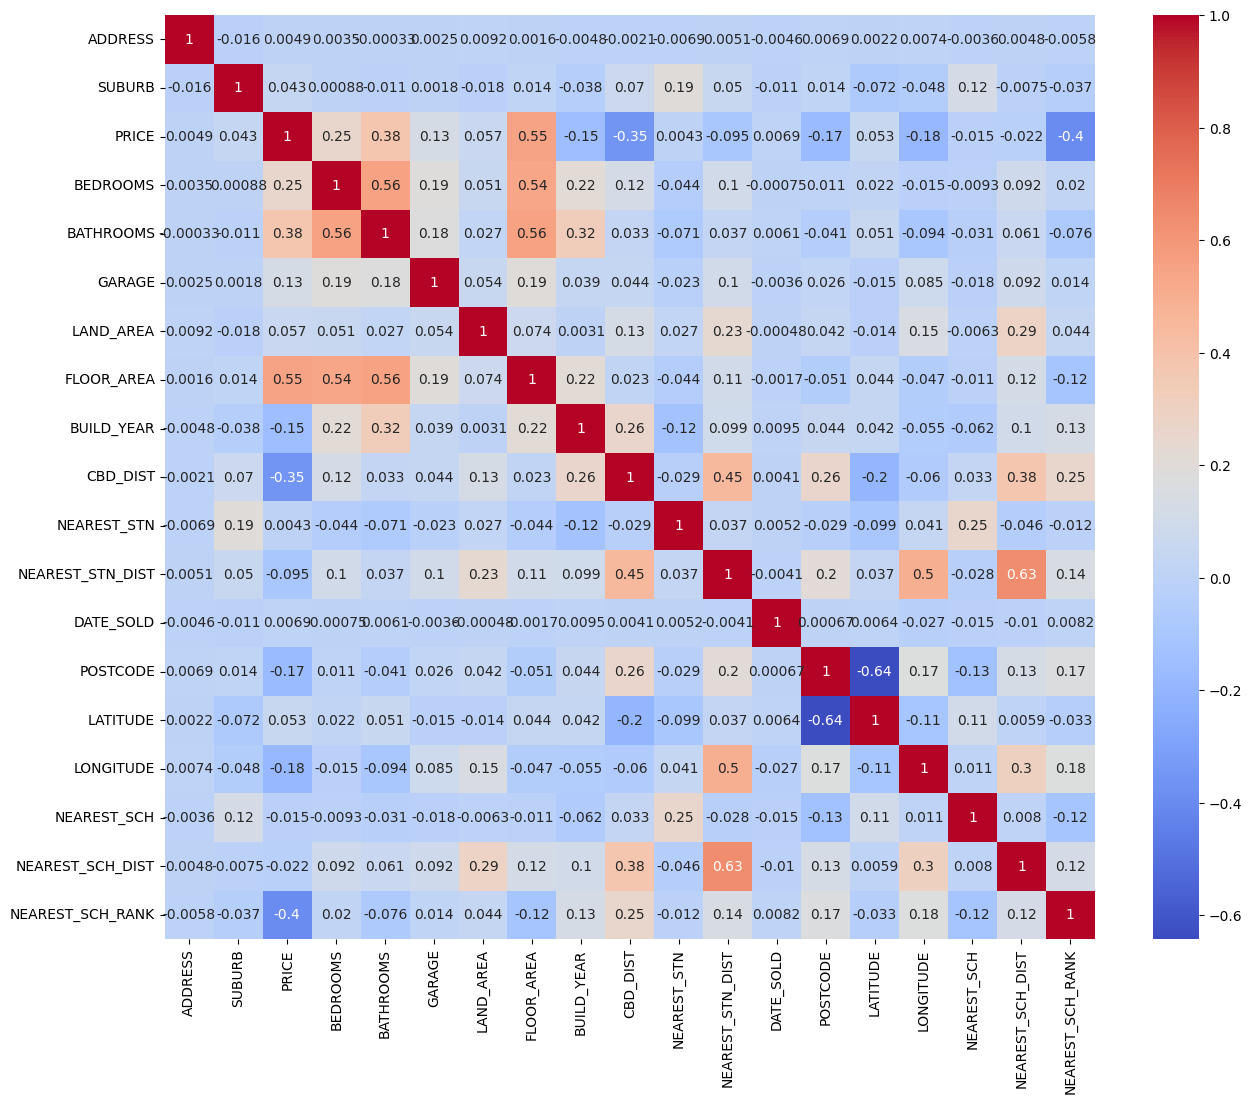

In [ ]:

x = df.corr()
plt.figure(figsize =(15, 12))
sns.heatmap(x, annot = True, cmap = 'coolwarm')
plt.show()


In [ ]:

cor=df.corr()['PRICE']#finding correlatiom
cor.sort_values(ascending=False)

,PRICE
PRICE,1.000000
FLOOR_AREA,0.548497
BATHROOMS,0.377133
BEDROOMS,0.252637
GARAGE,0.130578
LAND_AREA,0.056855
LATITUDE,0.053041
SUBURB,0.043057
DATE_SOLD,0.006947
ADDRESS,0.004906


In [ ]:

df.drop(columns = ['GARAGE'],          inplace = True)
df.drop(columns = ['LAND_AREA'],       inplace = True)
df.drop(columns = ['SUBURB'],          inplace = True)
df.drop(columns = ['DATE_SOLD'],       inplace = True)
df.drop(columns = ['ADDRESS'],         inplace = True)
df.drop(columns = ['NEAREST_STN'],     inplace = True)
df.drop(columns = ['NEAREST_SCH'],     inplace = True)
df.drop(columns = ['NEAREST_SCH_DIST'],inplace = True)
df.drop(columns = ['NEAREST_STN_DIST'],inplace = True)
#df.drop(columns = ['BUILD_YEAR'],      inplace = True)
df.drop(columns = ['POSTCODE'],        inplace = True)
#df.drop(columns = ['LONGITUDE'],       inplace = True)
df.drop(columns = ['LATITUDE'],       inplace = True)
# df.drop(columns = ['BEDROOMS'],       inplace = True)


In [ ]:

cor=df.corr()['PRICE']#finding correlatiom
cor.sort_values(ascending=False)


,PRICE
PRICE,1.000000
FLOOR_AREA,0.548497
BATHROOMS,0.377133
BEDROOMS,0.252637
BUILD_YEAR,-0.150847
LONGITUDE,-0.183734
CBD_DIST,-0.354327
NEAREST_SCH_RANK,-0.397960


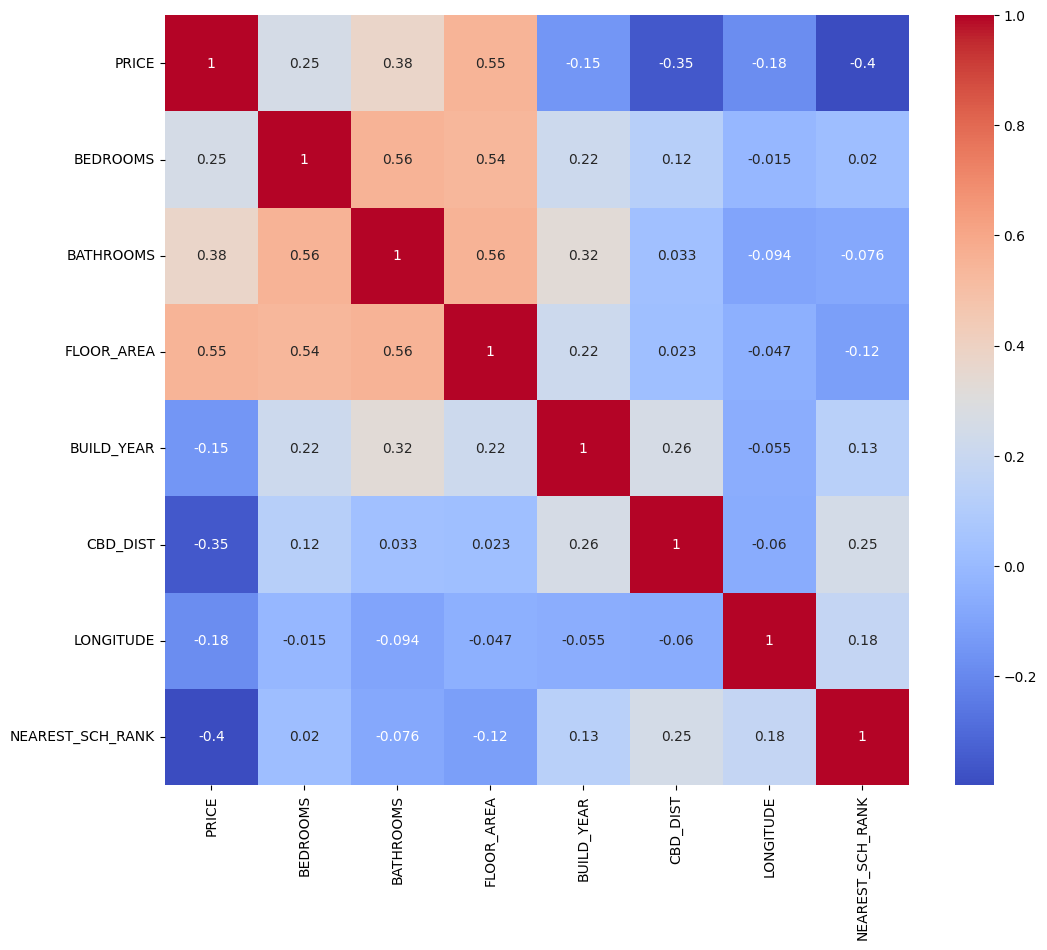

In [ ]:

x = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(x, annot = True, cmap = 'coolwarm')
plt.show()


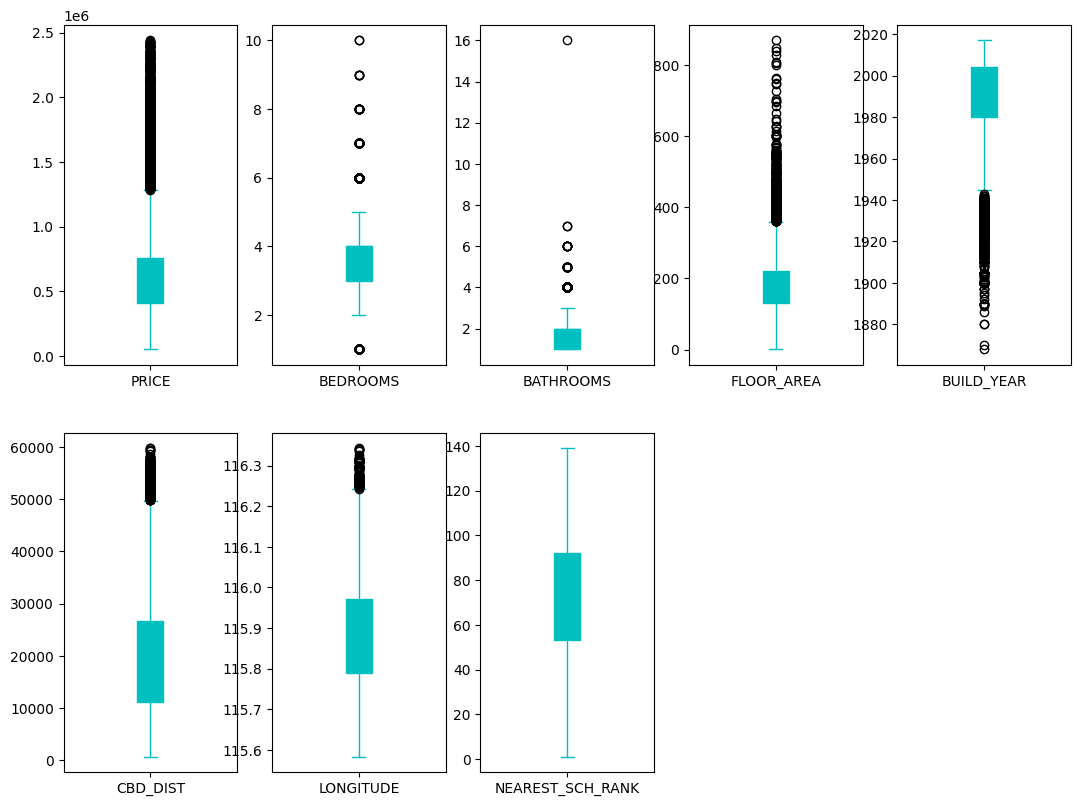

In [ ]:

df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='c',patch_artist=True)
plt.show()


In [ ]:

Q1=np.quantile(df, 0.25)
Q2=np.quantile(df, 0.50)
Q3=np.quantile(df, 0.75)
Q1, Q2, Q3


(6.0, 116.1053877, 2016.0)

In [ ]:

IQR = Q3 - Q1
IQR


2010.0

In [ ]:

# def remove_outliers_iqr(df, column):
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)

#     # Calculate the Interquartile Range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for detecting outliers
#     lower_bound = Q1 - 2  * IQR
#     upper_bound = Q3 + 2 * IQR

#     # Filter out the outliers from the DataFrame
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_filtered
# for i in df.columns:
#     df = remove_outliers_iqr(df, i)


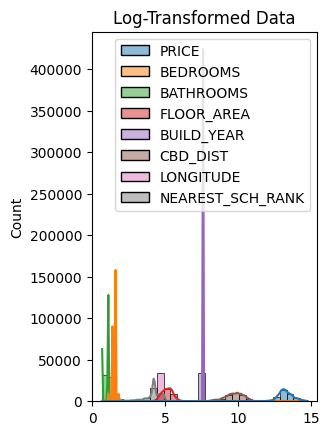

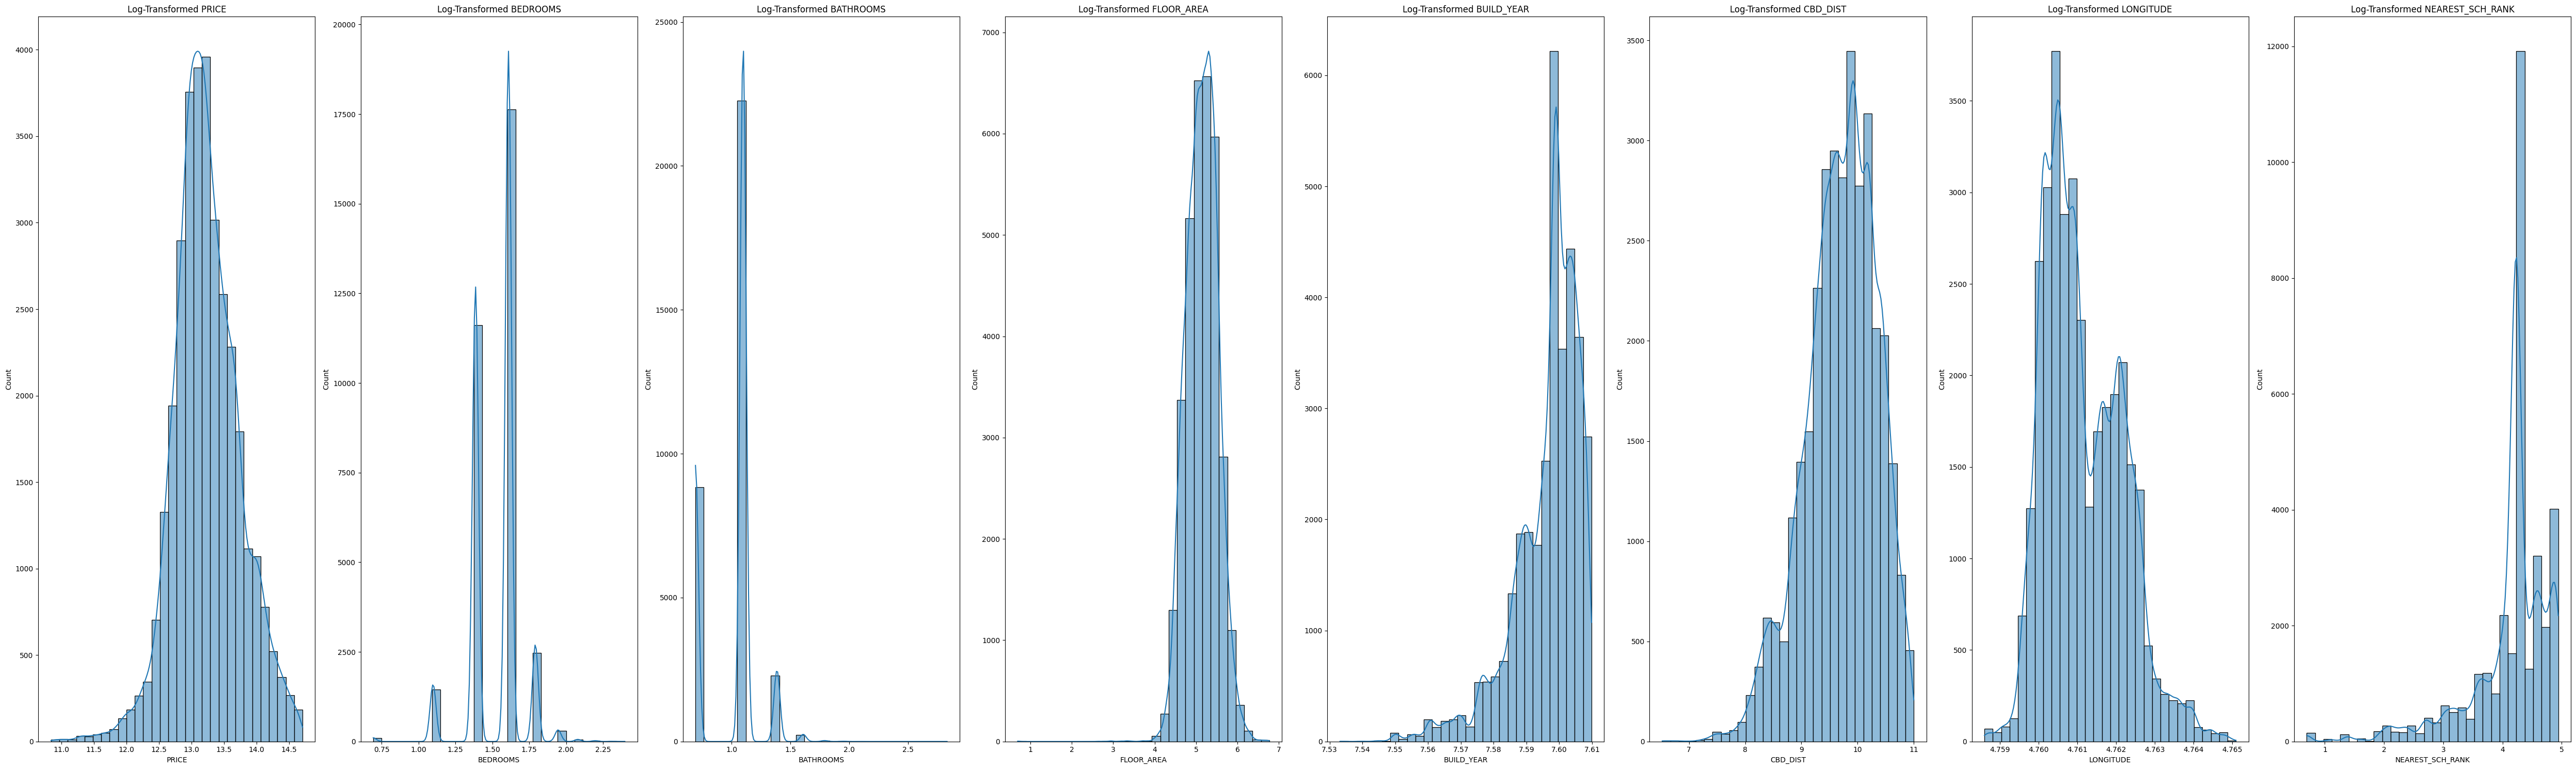

In [ ]:

#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()


In [ ]:
df.shape

(33656, 8)

In [ ]:

df = log_data


In [ ]:

# Define features and target variable
x = df[['FLOOR_AREA', 'BATHROOMS', 'CBD_DIST','BEDROOMS', 'LONGITUDE', 'BUILD_YEAR', 'NEAREST_SCH_RANK']] # Features
y = df['PRICE']    # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(x_test)

# Model evalution
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 0.17
Root Mean Squared Error: 0.27
R-squared: 0.71


In [ ]:

# Take user input for new data.
FLOOR_AREA       = float(input('Enter FLOOR_AREA - '))
BATHROOMS        = float(input('Enter BATHROOMS - '))
CBD_DIST         = float(input('Enter CBD_DIST - '))
BEDROOMS         = float(input('Enter BEDROOMS - '))
LONGITUDE        = float(input('Enter LONGITUDE - '))
BUILD_YEAR       = float(input('Enter BUILD_YEAR - '))
NEAREST_SCH_RANK = float(input('Enter NEAREST_SCH_RANK - '))

user_input = [[FLOOR_AREA, BATHROOMS, CBD_DIST, BEDROOMS, LONGITUDE, BUILD_YEAR, NEAREST_SCH_RANK]]

# make a prediction using the trained model
PRICE = model.predict(user_input)
print(f'the predicted :{PRICE}')


Enter FLOOR_AREA - 2
Enter BATHROOMS - 5
Enter CBD_DIST - 6
Enter BEDROOMS - 5
Enter LONGITUDE - 2
Enter BUILD_YEAR - 2
Enter NEAREST_SCH_RANK - 4
the predicted :[13.77079419]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
